# Consumer Complaints exploratory analysis


## 1) Introduction

The goal of this small project is to conduct an exploratory analysis of the dataset "Consumer complaints". 
Link to dataset : https://data.world/cfpb/consumer-complaints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to make plots

In [2]:
#Import the data. 
data = pd.read_csv("complaint_data.csv")

In [13]:
data #See what the dataset looks like.

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/09/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954
1,12/23/2019,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,AES/PHEAA,MA,019XX,NaN,NaN,Web,12/23/2019,Closed with explanation,Yes,NaN,3475943
2,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
3,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
4,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471761,01/29/2016,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,Company believes it acted appropriately as aut...,American Financial Network Inc.,CA,91321,NaN,Consent not provided,Web,01/29/2016,Closed with monetary relief,Yes,No,1765368
1471762,11/27/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",WI,531XX,NaN,NaN,Web,12/12/2019,Closed with explanation,Yes,NaN,3452575
1471763,05/07/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,"Hello, We were approved for a loan modificatio...",NaN,Ocwen Financial Corporation,CA,951XX,NaN,Consent provided,Web,05/07/2019,Closed with explanation,Yes,NaN,3235219
1471764,07/18/2019,Mortgage,Conventional home mortgage,Closing on a mortgage,NaN,I started the process to refinance my current ...,Company has responded to the consumer and the ...,Freedom Mortgage Company,NC,275XX,NaN,Consent provided,Web,07/18/2019,Closed with explanation,Yes,NaN,3311105


Upon seeing the data, what questions can be asked ? 

1) What is the date range, i.e. from when until when was the data collected ? 

2) What product encounters the most issues ? However, we need to be careful with drawing insights ; if e.g. mortage has the most issues, is it because mortgage has some inherent "properties" that makes it prone to errors/issues, or is it because the majority of companies in the dataset deals with mortgage ? 

3) There are multiple possible issues, which are stated in words ; what words or group of words often come back ? What if we show the most recurring words for each product separately ? We could also do the same for the variable "Consumer complaint narrative" which are whole sentences.

4) We see there are several companies. We could observe if some companies have a lot of complaints (which could mean a problematic company as well as a company with lots and lots of consumers, and that would be associated with a proportionally higher count of issues ; so we need to be careful with drawing conclusions). We could also observe the ratio of timely response (Yes/No) and for consumer disputed (Yes/No) for each company or all companies in general. 

These are some questions we will investigate, and of course this list is non-exhaustive. Several other questions can and should be of interest.

## 2) Exploratory analysis 

Our first question was : 

"What is the date range, i.e. from when until when was the data collected ?"

In [20]:
earliest_date = min(data["Date received"])
lastest_date = max(data["Date received"])
print(earliest_date)
print(lastest_date)

01/01/2012
12/31/2019


We now see that the data was collected from the 1st of January 2012 until the 31st of December 2019.

Our second question was : 

"What product encounters the most issues ? However, we need to be careful with drawing insights ; if e.g. mortage has the most issues, is it because mortgage has some inherent "properties" that makes it prone to errors/issues, or is it because the majority of companies in the dataset deals with mortgage ?"

First, we need to see how many different products are there in this dataset. 

In [17]:
data['Product'].nunique()

18

<AxesSubplot:>

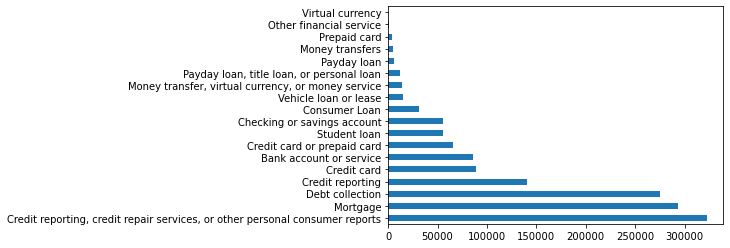

In [10]:
#We will plot the 18 products and will see how many issues there are for each product.
data['Product'].value_counts()[:18].plot(kind='barh', stacked = True) 

<AxesSubplot:>

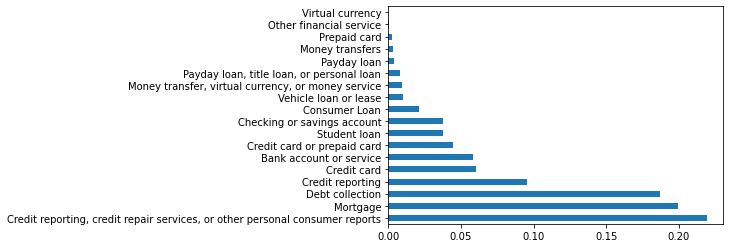

In [11]:
data['Product'].value_counts(normalize=True)[:18].plot(kind='barh', stacked = True)

We see that around 900'000 issues, or roughly 60% of the issues in the whole dataset, are related to Debt Collection, Mortage and Credit reporting/Credit repair services/Other personal consumer reports. 

Our third question was :

"There are multiple possible issues, which are stated in words ; what words or group of words often come back ? What if we show the most recurring words for each product separately ? We could also do the same for the variable "Consumer complaint narrative" which are whole sentences."

<BarContainer object of 30 artists>

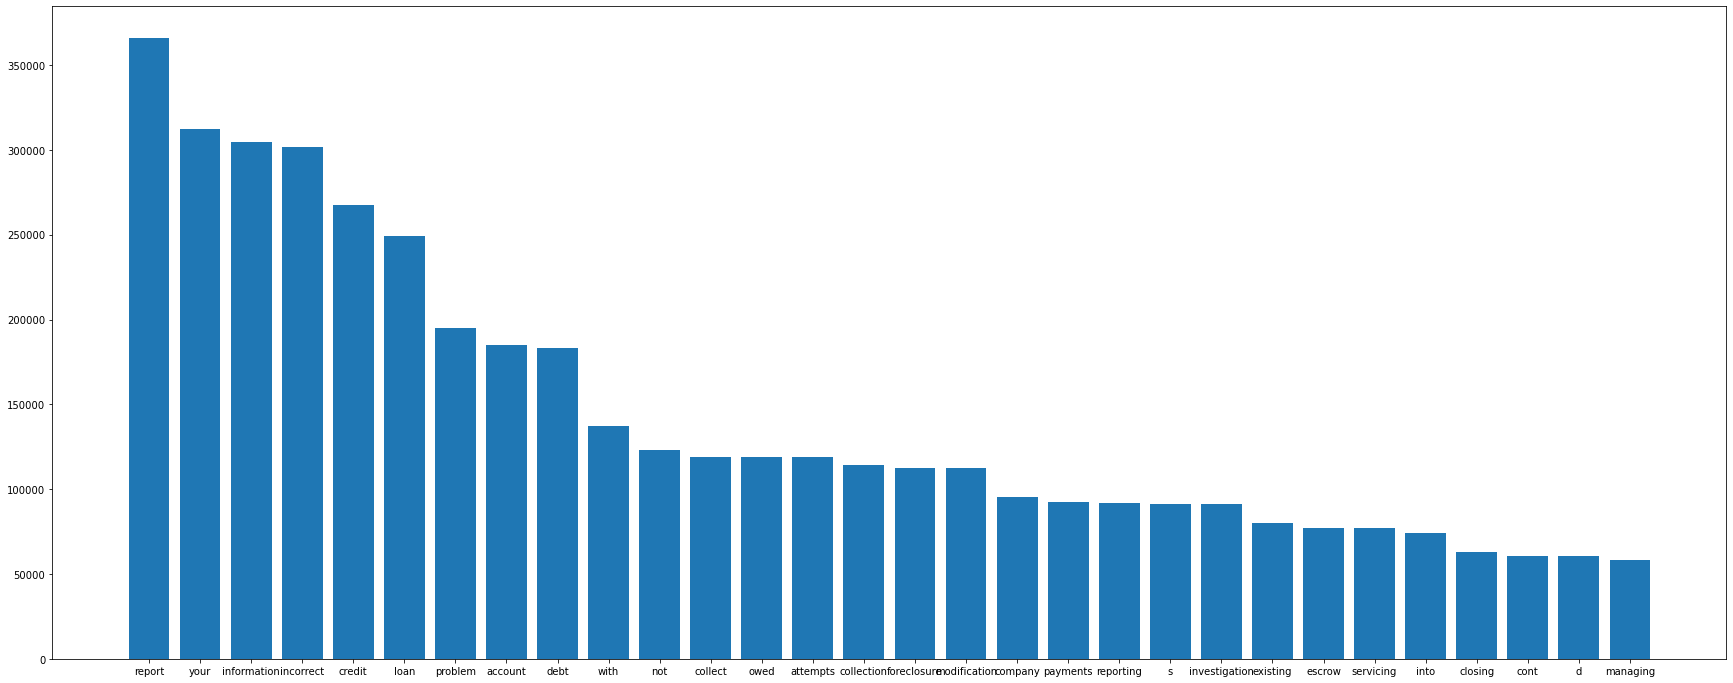

In [53]:
#See 30 most used words.  The graph is hard to read, so we'll split it in two graphs further in
data['Issue'] = data['Issue'].str.lower() #we want to consider e.g. report and Report as twice the word "report" and not different words
data['Issue'] = data['Issue'].str.replace("[^a-zA-Z#]", " ") #Remove special characters, numbers, punctuations
data['Issue'] = data['Issue'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) #Remove "words" of 1 and 2 letters because they usually don't carry any meaning. "on", "or" and "a" are not interesting for instance.  
freq = pd.Series(' '.join(data['Issue']).split()).value_counts()[:30]
plt.figure(figsize=(30,12))
plt.bar(freq.index,freq.values)

<BarContainer object of 13 artists>

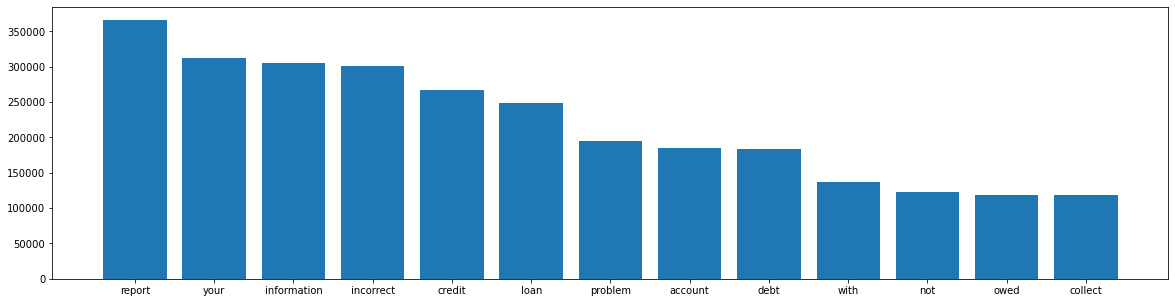

In [56]:
#See 13 most used words. 
freq = pd.Series(' '.join(data['Issue']).split()).value_counts()[:13]
plt.figure(figsize=(20,5))
plt.bar(freq.index,freq.values)

<BarContainer object of 16 artists>

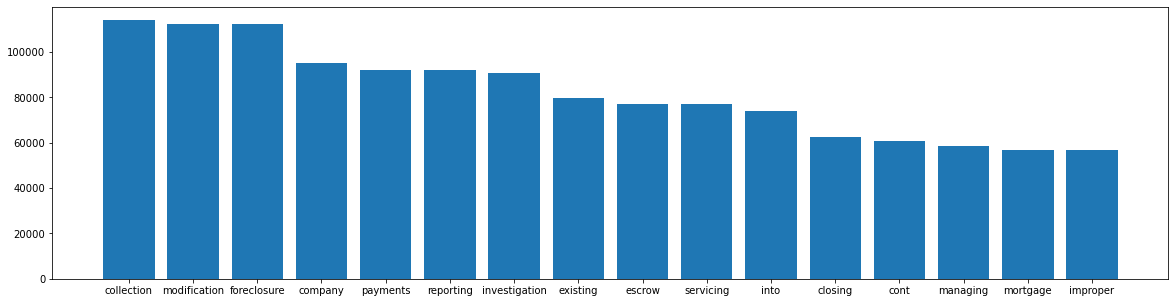

In [57]:
#See 14th-30th most used words. 
freq = pd.Series(' '.join(data['Issue']).split()).value_counts()[14:30]
plt.figure(figsize=(20,5))
plt.bar(freq.index,freq.values)

We can see the words "information" and "incorrect" standing out, from which we can intuit the most common of issues the customers are facing : incorrect information, or other things that are incorrect. Of course, the word "problem" is predominant as well, which makes sense as this is a synonym of issue. Regarding the incorrect information or other incorrect matters, they may relate to "credit", "loan", "debt", and "account".

In [78]:
#Prepare a second dataset to investigate Consumer complaint narrative, which has missing values (ie. no complaint narratives).
#We can intuit that the complain narrative is an optional feature when filing the complaint. 
data2 = data
data2 = data2.dropna(subset = ['Consumer complaint narrative'])

In [79]:
data2

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4,03/04/2016,Credit card,NaN,billing disputes,NaN,i am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
8,03/03/2018,"Credit reporting, credit repair services, or o...",Credit reporting,incorrect information your report,Information belongs to someone else,on xx xx an item showed up on my credit rep...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,245XX,NaN,Consent provided,Web,03/03/2018,Closed with explanation,Yes,NaN,2831821
9,01/02/2019,Debt collection,I do not know,attempts collect debt not owed,Debt was result of identity theft,saw on my credit report that there is a collec...,Company believes complaint caused principally ...,"Cascade Capital, LLC",FL,334XX,Older American,Consent provided,Web,01/18/2019,Closed with explanation,Yes,NaN,3114357
10,12/23/2018,"Credit reporting, credit repair services, or o...",Credit reporting,improper use your report,Credit inquiries on your report that you don't...,capital one auto finacing xx xx unknown i...,NaN,CAPITAL ONE FINANCIAL CORPORATION,MD,212XX,NaN,Consent provided,Web,12/23/2018,Closed with explanation,Yes,NaN,3108212
12,04/13/2018,Credit card or prepaid card,General-purpose credit card or charge card,problem with purchase shown your statement,Credit card company isn't resolving a dispute ...,i own a small trucking company one of my truc...,NaN,TD BANK US HOLDING COMPANY,NJ,NaN,NaN,Consent provided,Web,04/16/2018,Closed with monetary relief,Yes,NaN,2874325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471751,02/02/2017,Credit card,NaN,billing disputes,NaN,i have sent two certified letters to xxxxsanta...,NaN,Santander Consumer USA Holdings Inc.,TX,750XX,NaN,Consent provided,Web,02/13/2017,Closed with explanation,Yes,No,2323437
1471756,08/14/2019,Mortgage,Conventional home mortgage,trouble during payment process,NaN,phh started servicing my mortgage on xx xx ...,NaN,Ocwen Financial Corporation,VA,222XX,NaN,Consent provided,Web,08/15/2019,Closed with explanation,Yes,NaN,3340255
1471759,11/06/2015,Money transfers,Domestic (US) money transfer,money was not available when promised,NaN,i having been trading on ebay and using paypal...,NaN,"Paypal Holdings, Inc",TN,372XX,NaN,Consent provided,Web,11/06/2015,Closed with explanation,Yes,No,1642843
1471763,05/07/2019,Mortgage,Conventional home mortgage,struggling pay mortgage,NaN,hello we were approved for a loan modificatio...,NaN,Ocwen Financial Corporation,CA,951XX,NaN,Consent provided,Web,05/07/2019,Closed with explanation,Yes,NaN,3235219


In [80]:
(481087/1471766)*100

32.687737045155274

We see that we have 481087 customer complaint narrative over 1471766 issues, yielding a 32.68% amount of customer writing a complaint narrative with their issues filing.

In [82]:
#We clean up the data2 a bit...
data2['Consumer complaint narrative'] = data2['Consumer complaint narrative'].str.lower() #we want to consider e.g. report and Report as twice the word "report" and not different words
data2['Consumer complaint narrative'] = data2['Consumer complaint narrative'].str.replace("[^a-zA-Z#]", " ") #Remove special characters, numbers, punctuations
data2['Consumer complaint narrative'] = data2['Consumer complaint narrative'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) #Remove "words" of 1 and 2 letters

<BarContainer object of 20 artists>

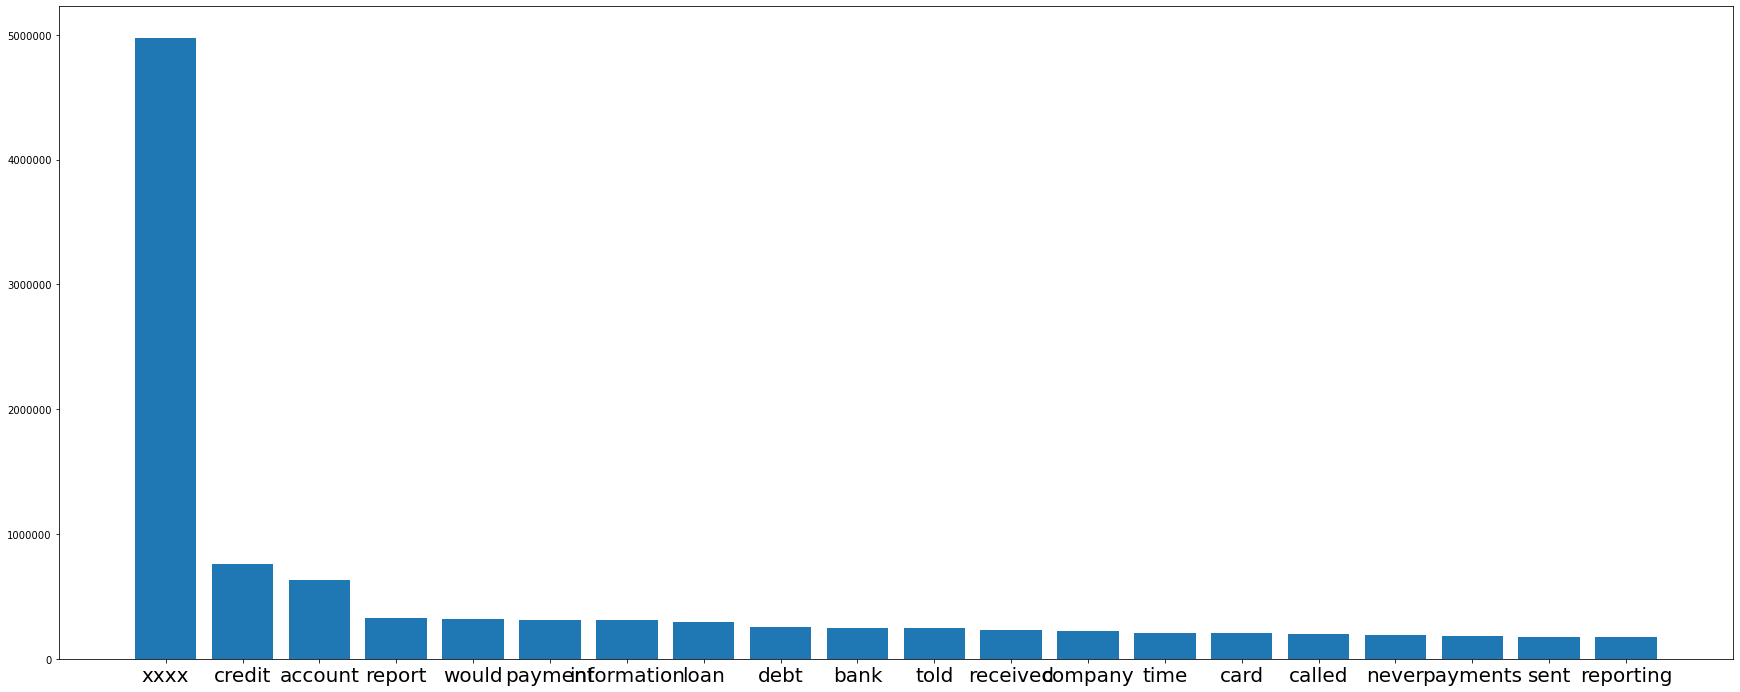

In [97]:
#See 20 most used words. 
freq = pd.Series(' '.join(data2['Consumer complaint narrative']).split()).value_counts()[:20]
plt.figure(figsize=(30,12))
plt.xticks(size = 20) #bigger legend on x-axis
plt.ticklabel_format(style='plain') 
plt.bar(freq.index,freq.values)


It is hard to see a trend among the top 20 words of the complaints, as many words aren't useful : the, and, that... These are called stopwords and need to be removed. 

In [91]:
#Remove "stopwords". We import a pre-made dictionary that includes many stopwords that shouldn't be relevant to predict emotion.
import nltk
stopword = nltk.corpus.stopwords.words('english')

In [92]:
data2['Consumer complaint narrative'] = data2['Consumer complaint narrative'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopword]))

<BarContainer object of 20 artists>

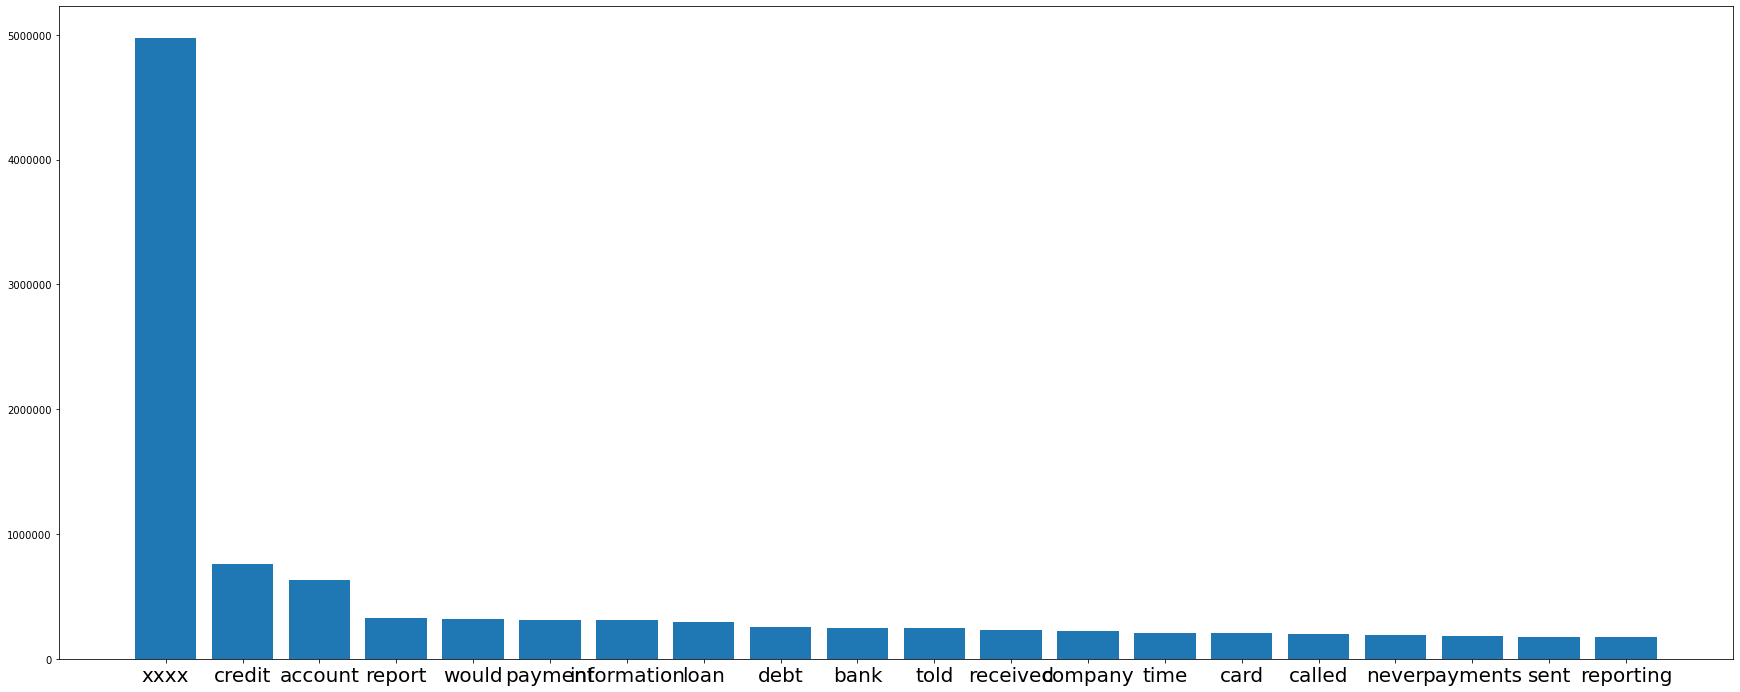

In [98]:
#See 20 most used words. 
freq = pd.Series(' '.join(data2['Consumer complaint narrative']).split()).value_counts()[:20]
plt.figure(figsize=(30,12))
plt.xticks(size = 20) #bigger legend on x-axis
plt.ticklabel_format(style='plain') 
plt.bar(freq.index,freq.values)


The 20 most used words in Customer Complaints is relevant to the issues at hand : credit, account, payment, loan etc. However it's a bit hard to draw insights from this. We argue that analyzing the words used may not really be that useful. 

The fourth question was : 
    
"We see there are several companies. We could observe if some companies have a lot of complaints (which could mean a problematic company as well as a company with lots and lots of consumers, and that would be associated with a proportionally higher count of issues ; so we need to be careful with drawing conclusions). We could also observe the ratio of timely response (Yes/No) and for consumer disputed (Yes/No) for each company or all companies in general." 

In [15]:
data['Company'].nunique()

5499

From a single line of code we have confirmed we have a staggering amount of 5'499 companies. Of course, making a plot of 5'499 companies is both time-consuming and irrelevant. We will plot the 20 companies with the highest amount of issues.

<AxesSubplot:>

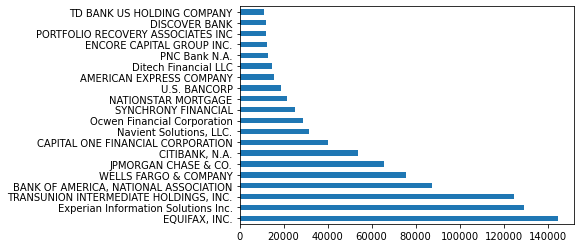

In [14]:
data['Company'].value_counts()[:20].plot(kind='barh', stacked = True)

Considering only the top 20 companies with the highest amount of issues, Transunion Intermediate Holdings INC, Experian Information Solutions INC and Equifax INC are the top 3, adding up to 400'000 issues with just the three of them (which amounts to around 30% of the whole dataset). 

<AxesSubplot:>

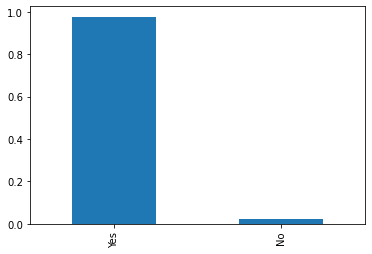

In [23]:
data['Timely response?'].value_counts(normalize=True)[:20].plot(kind='bar', stacked = True)

Fortunately, we have a huge majority of "Yes" for timely responses, evidencing that most companies deal with issues quickly and seriously. 

In [26]:
data['Company'].value_counts()[:20]

EQUIFAX, INC.                             144853
Experian Information Solutions Inc.       129127
TRANSUNION INTERMEDIATE HOLDINGS, INC.    124533
BANK OF AMERICA, NATIONAL ASSOCIATION      87526
WELLS FARGO & COMPANY                      75672
JPMORGAN CHASE & CO.                       65573
CITIBANK, N.A.                             53712
CAPITAL ONE FINANCIAL CORPORATION          40004
Navient Solutions, LLC.                    31460
Ocwen Financial Corporation                28982
SYNCHRONY FINANCIAL                        24993
NATIONSTAR MORTGAGE                        21608
U.S. BANCORP                               18842
AMERICAN EXPRESS COMPANY                   15579
Ditech Financial LLC                       14687
PNC Bank N.A.                              12786
ENCORE CAPITAL GROUP INC.                  12511
PORTFOLIO RECOVERY ASSOCIATES INC          11813
DISCOVER BANK                              11811
TD BANK US HOLDING COMPANY                 11020
Name: Company, dtype

In [28]:
data3 = data[data.groupby('Company').Company.transform('count')>11019].copy() 

In [30]:
data3['Company'].nunique()

20

In [58]:
data4 = data3.groupby(['Company','Timely response?'])['Company'].size().reset_index(name='count')


In [66]:
data4


,Company,Timely response?,count
0,AMERICAN EXPRESS COMPANY,No,2
1,AMERICAN EXPRESS COMPANY,Yes,15577
2,"BANK OF AMERICA, NATIONAL ASSOCIATION",No,1587
3,"BANK OF AMERICA, NATIONAL ASSOCIATION",Yes,85939
4,CAPITAL ONE FINANCIAL CORPORATION,No,71
5,CAPITAL ONE FINANCIAL CORPORATION,Yes,39933
6,"CITIBANK, N.A.",No,363
7,"CITIBANK, N.A.",Yes,53349
8,DISCOVER BANK,No,15
9,DISCOVER BANK,Yes,11796


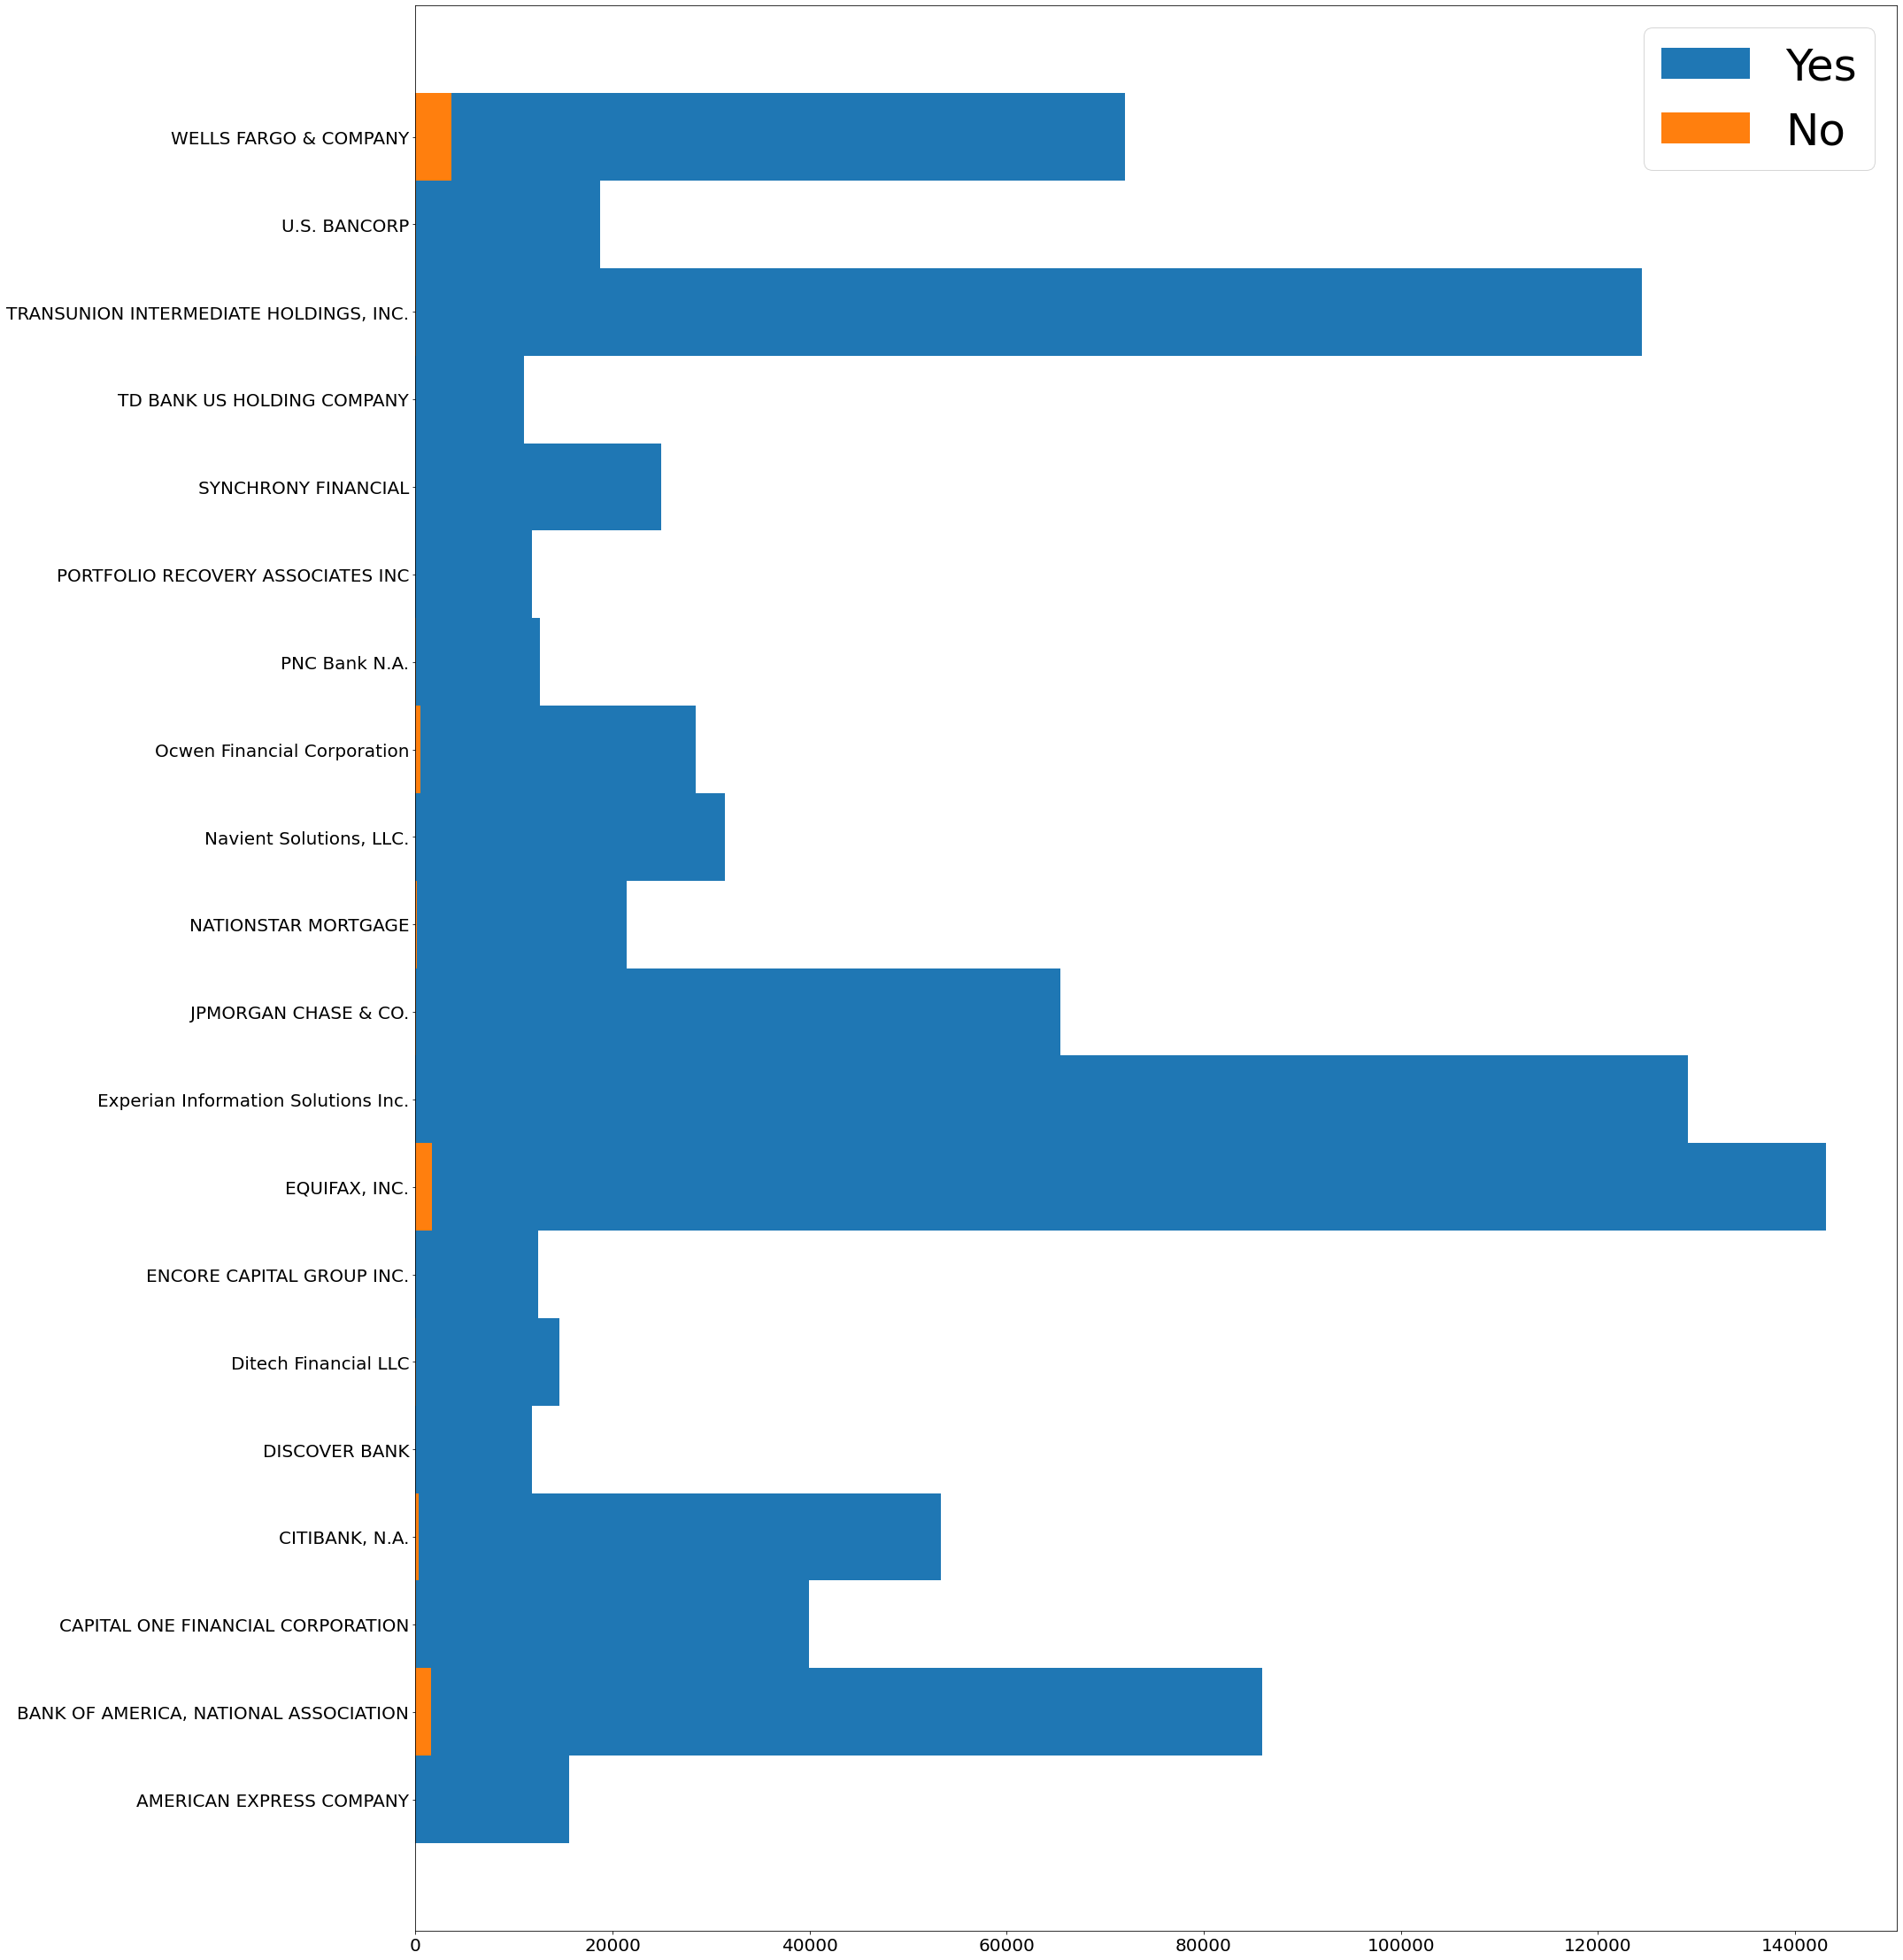

In [89]:
# Create bars
plt.figure(figsize=(30,40))
plt.xticks(size = 20) #bigger legend on x-axis
plt.yticks(size = 20) #bigger legend on x-axis

plt.barh( data4["Company"],data4["count"], data4["Timely response?"] == "Yes", label='Yes')
plt.barh( data4["Company"],data4["count"], data4["Timely response?"] == "No", label='No')
plt.legend(fontsize=50) 
plt.show()

Upon conducting a deeper analysis on timely responses, we notice that Bank of America, Equifax and Wells Fargo have a certain amount of negative timely responses compared to other companies. Customers of these companies could interpret this as poor work ethic and this could lead to poorer customer satisfaction. 